# Visualisations

####  Goals
* To visualise all features: numerical with distplots and categorical with boxplots.
* Begin to assess outliers.
* Visualise correlation between features using a heatmap.

#### Output
* Sample visualisations to include in presentations.

In [1]:
cd ..

/home/jovyan/dsi/CAPSTONE


In [2]:
%run lib/__init__.py
%matplotlib inline

In [3]:
commute_df = pd.read_pickle('./data/no_null_commute_df.pkl')
commute_df.head()

Survey_Cycle  Response_Rate  Total_Employees  VMT/\nEmployee  Goal_VMT  \
0    2007/2008           73.2            183.0             7.0       5.7   
1    2009/2010           73.0            240.0             6.6       5.7   
2    2011/2012           52.8            436.0             5.3       5.7   
3    2013/2014           72.2            650.0             5.2       5.7   
4    2009/2010           78.0            337.0             2.5       0.0   

   Total_VMT  Total_Goal_VMT  NDAT_Rate  Goal_NDAT_Rate_(Worksite_only)  \
0      763.0          625.66       42.8                            48.8   
1     1141.8          625.66       49.5                            48.8   
2     1219.0          625.66       66.7                            48.8   
3     2438.8          625.66       68.9                            48.8   
4      390.0            0.00       82.8                             0.0   

   Total_Goal_NDAT_Trips                  ...                   \
0                  264.5                  ...                    
1                    0.0                  ...                    
2                    0.0                  ...                    
3                    0.0                  ...                    
4                    0.0                  ...                    

   cost_of_meeting_program_requirements  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   cost_of_financial_incentives_subsidies_paid_to_employees  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   cost_of_facility_upkeep  cost_of_other  list_other_costs  \
0                      0.0            0.0    Did Not Answer   
1                      0.0            0.0    Did Not Answer   
2                      0.0            0.0    Did Not Answer   
3                      0.0            0.0    Did Not Answer   
4                      0.0            0.0    Did Not Answer   

   applied_for_state_tax_credits_for_expenditure_promoting_employee_commute_alternatives  \
0                                            Unknown                                       
1                                            Unknown                                       
2                                            Unknown                                       
3                                            Unknown                                       
4                                            Unknown                                       

   worksites_transportation_program_priorities_next_six_months-1  \
0                             Keep parking cost down               
1                             Keep parking cost down               
2                             Keep parking cost down               
3                             Keep parking cost down               
4                         Audit current user program               

   worksites_transportation_program_priorities_next_six_months-2  \
0                                 encourage orca use               
1                                 encourage orca use               
2                                 encourage orca use               
3                                 encourage orca use               
4                                Promote CTR program               

   worksites_transportation_program_priorities_next_six_months-3  \
0                        encourage Pronto bike share               
1                        encourage Pronto bike share               
2                        encourage Pronto bike share               
3                        encourage Pr

## 1. Initial Plots

View `Response_Rate` and `Alone_Share` to get a sense of where I start, what is the percentage of respondants I have for the survey and what does the shape of my target column `Alone_Share` look like.

#### Response Rate
Skewed to the left, higher percentage of respondants than not respondants.

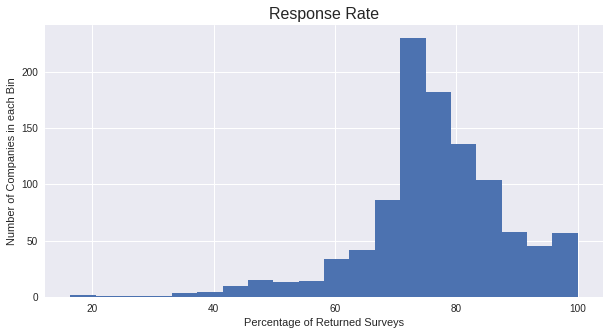

In [4]:
fig = plt.figure(figsize=(10,5))
plt.hist(commute_df['Response_Rate'], bins=20)
plt.title('Response Rate', size=16)
plt.xlabel('Percentage of Returned Surveys')
plt.ylabel('Number of Companies in each Bin')
plt.savefig('./figures/response_rate.png')

#### Alone Share
Skewed to the right, it is more common to have a lower drive alone rate than a higher one.

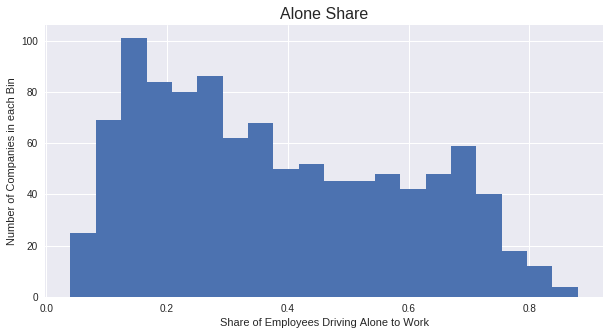

In [5]:
fig = plt.figure(figsize=(10,5))
plt.hist(commute_df['Alone_Share'], bins=20)
plt.title('Alone Share', size=16)
plt.xlabel('Share of Employees Driving Alone to Work')
plt.ylabel('Number of Companies in each Bin')
plt.savefig('./figures/alone_share.png')

## 2. Numerical Plots

In [6]:
# to get a list of numerical columns
commute_stats_df = pd.read_pickle('./data/clean_commute_stats_df.pkl')

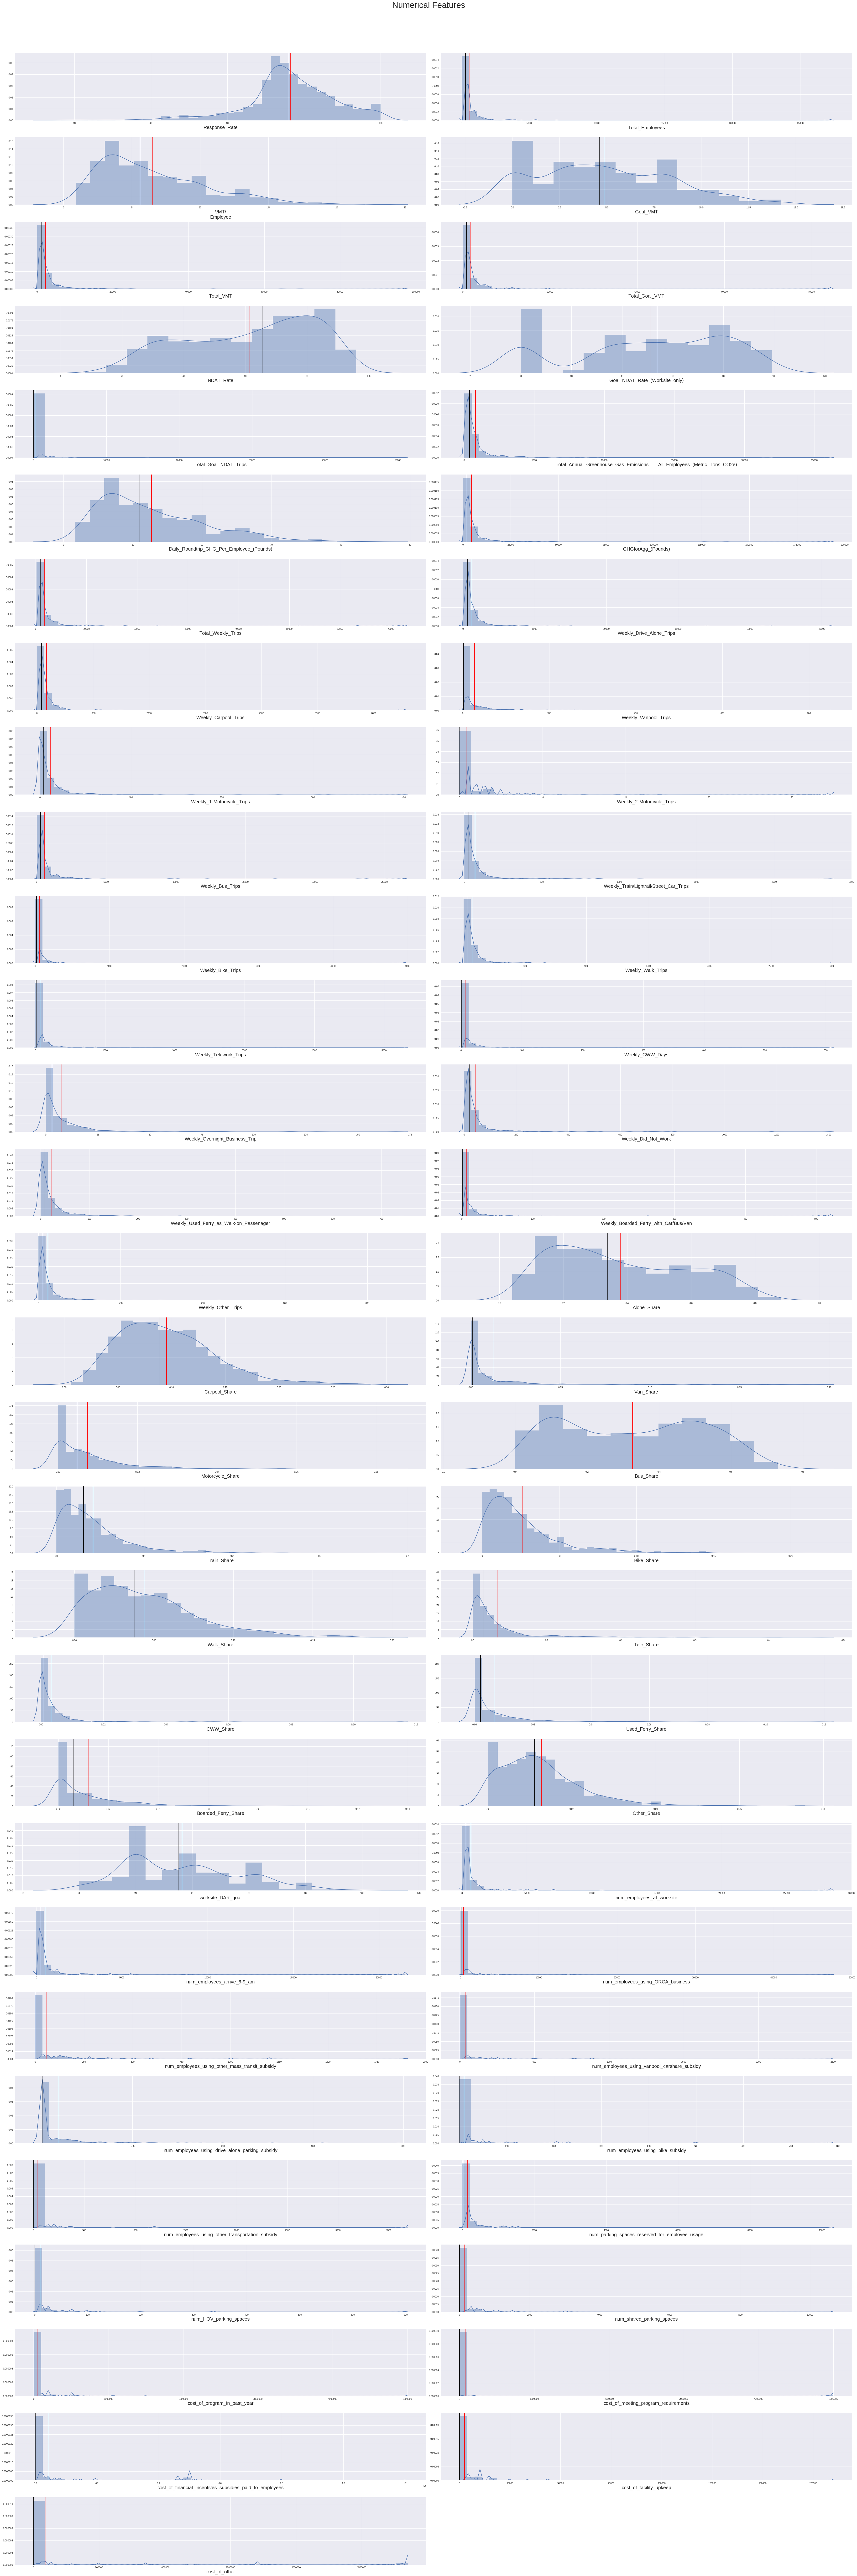

In [7]:
# plots for all of the numeric features.
fig = plt.figure(figsize=(50,150))
fig.suptitle('Numerical Features', size=35, y=1)

for i, num_col in enumerate(commute_stats_df.index):
    fig.add_subplot(30,2,1+i)
    sns.distplot(commute_df[num_col])
    plt.xlabel(num_col, size=20)
    
    mean_value = commute_df[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = commute_df[num_col].median()
    plt.axvline(median_value, c='black')
    
plt.tight_layout()
fig.subplots_adjust(top=0.98)
plt.savefig('./figures/numerical_subplots.png')

In [8]:
# just a sample for the presentations.
num_columns_for_pres = [
    'worksite_DAR_goal',
    'num_employees_at_worksite',
    'GHGforAgg_(Pounds)',
    'Bike_Share'
]

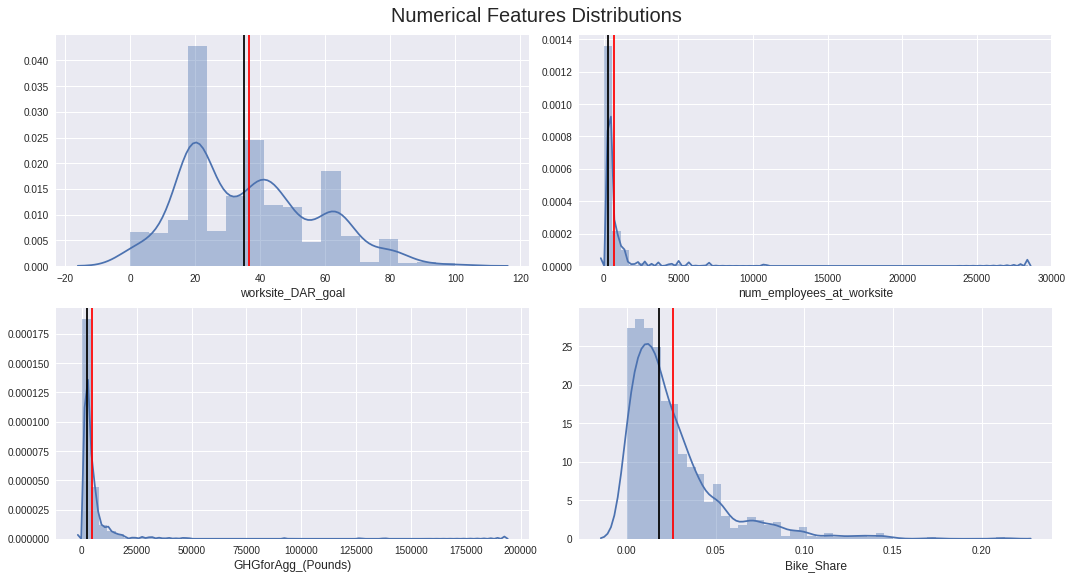

In [9]:
# I would like to re-write this section so that the labels of each graph are my own not just the column header
fig = plt.figure(figsize=(15,8))
fig.suptitle('Numerical Features Distributions', fontsize=20, y=1)

for i, num_col in enumerate(num_columns_for_pres):
    fig.add_subplot(2,2,1+i)
    sns.distplot(commute_df[num_col])
    plt.xlabel(num_col, size=12)
    
    mean_value = commute_df[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = commute_df[num_col].median()
    plt.axvline(median_value, c='black')
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig('./figures/numerical_subplots_for_pres.png')

#### Numerical Features against `Alone Share`

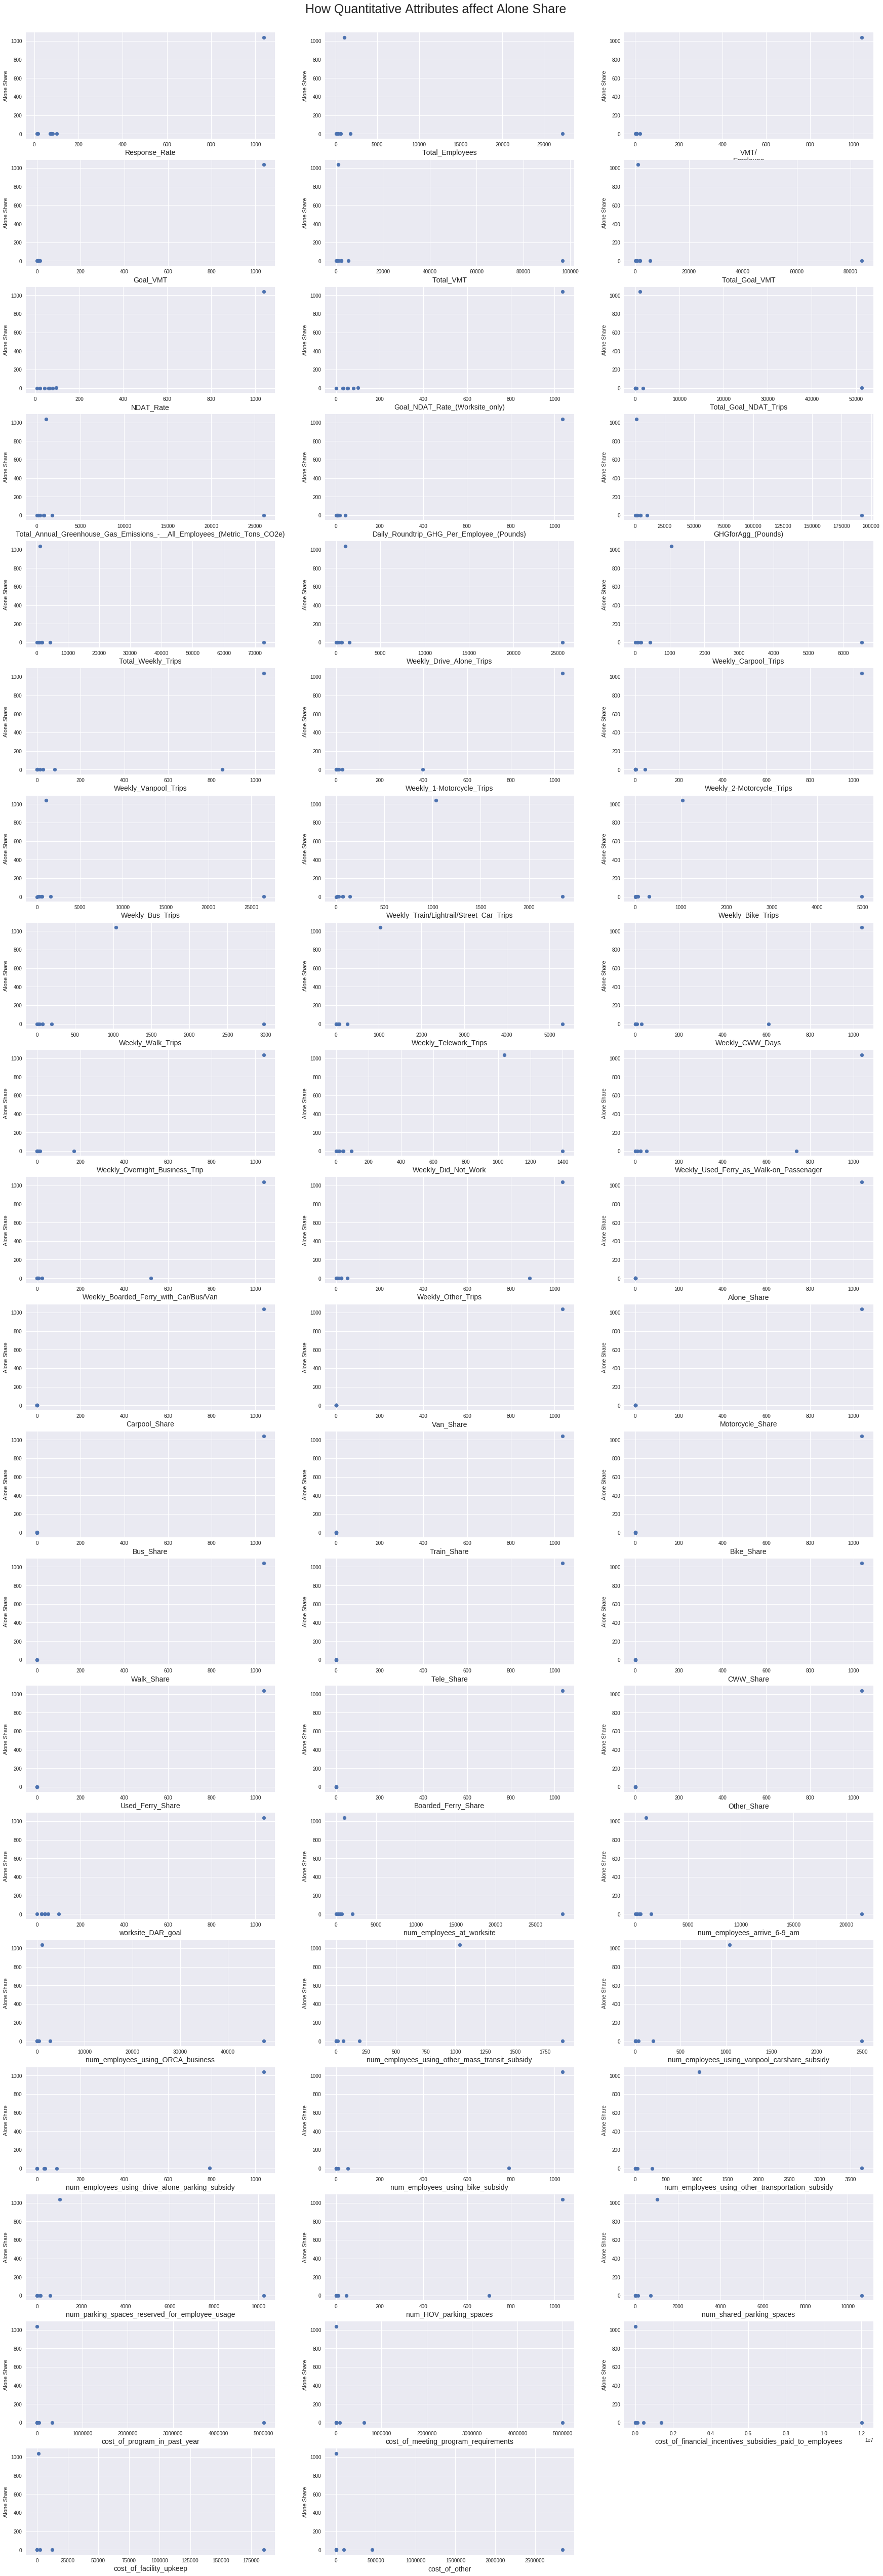

In [10]:
# these don't show much because of the single values that are much larger than the rest.
fig = plt.figure(figsize=(30, 80))
plt.suptitle("How Quantitative Attributes affect Alone Share", fontsize=25, y=1)

for i, col in enumerate(commute_stats_df.T.columns):
    fig.add_subplot(20, 3, 1+i)
    plt.scatter(x=commute_stats_df.T[col], y=commute_stats_df.T['Alone_Share'])
    plt.xlabel("{}".format(col), fontsize=14)
    plt.ylabel('Alone Share')
    
fig.subplots_adjust(top=0.99)
plt.savefig('./figures/numerical_against_alone_share.png')

## 3. Categorical Plots

In [11]:
# to get a list of category features
commute_dtypes_df = pd.read_pickle('./data/commute_dtypes_df.pkl')

In [12]:
categorical_columns = list(commute_dtypes_df.loc[commute_dtypes_df['column_dtypes'] == 'category'].T.columns)

In [13]:
# to get just a sample.
categorical_plot_columns = [
    'offers_ORCA_business_passport',
    'offers_mass_transit_other_than_ORCA_business',
    'offers_vanpool_carshare_subsidy',
    'offers_vanpool_carshare_parking_subsidy',
    'offers_drive_alone_parking_subsidy',
    'offers_bike_subsidy',
    'offers_showers',
    'offers_lockers',
    'offers_bike_cage_or_locked_bike_room',
    'offers_covered_bike_racks',
    'offers_uncovered_bike_racks',
    'offers_telecomute_options',
    'offers_flex_employee_start_end_times',
    'offers_compressed_work_week_scheduling',
    'offers_corporate_discount_for_zipcar_other_carshares',
    'offers_corporate_discount_lyft_uber_taxi',
    'offers_employer_provided_shuttle',
    'offers_internal_circulator',
    'offers_employer_provided_cars_for_offsite_business_appointments',
    'offers_company_provided_bikes'
]

In [14]:
fig = plt.figure(figsize=(100,250))

for i, col in enumerate(categorical_plot_columns):
    fig.add_subplot(10,2,1+i)
    sns.boxplot(commute_df[col], commute_df['Alone_Share'])
    plt.xlabel(col, fontsize=50)
    plt.ylabel('Alone Share', fontsize=50) # plotting against alone share since that is my target
    plt.xticks(rotation='vertical', fontsize=50)
    
plt.tight_layout()
plt.savefig('./figures/categorical_subplots.png')

In [15]:
# to get a smaller sample for the presentations.
categorical_plot_columns_2 = [
    'offers_ORCA_business_passport',
    'offers_drive_alone_parking_subsidy',
    'offers_bike_subsidy',
    'offers_flex_employee_start_end_times',
]

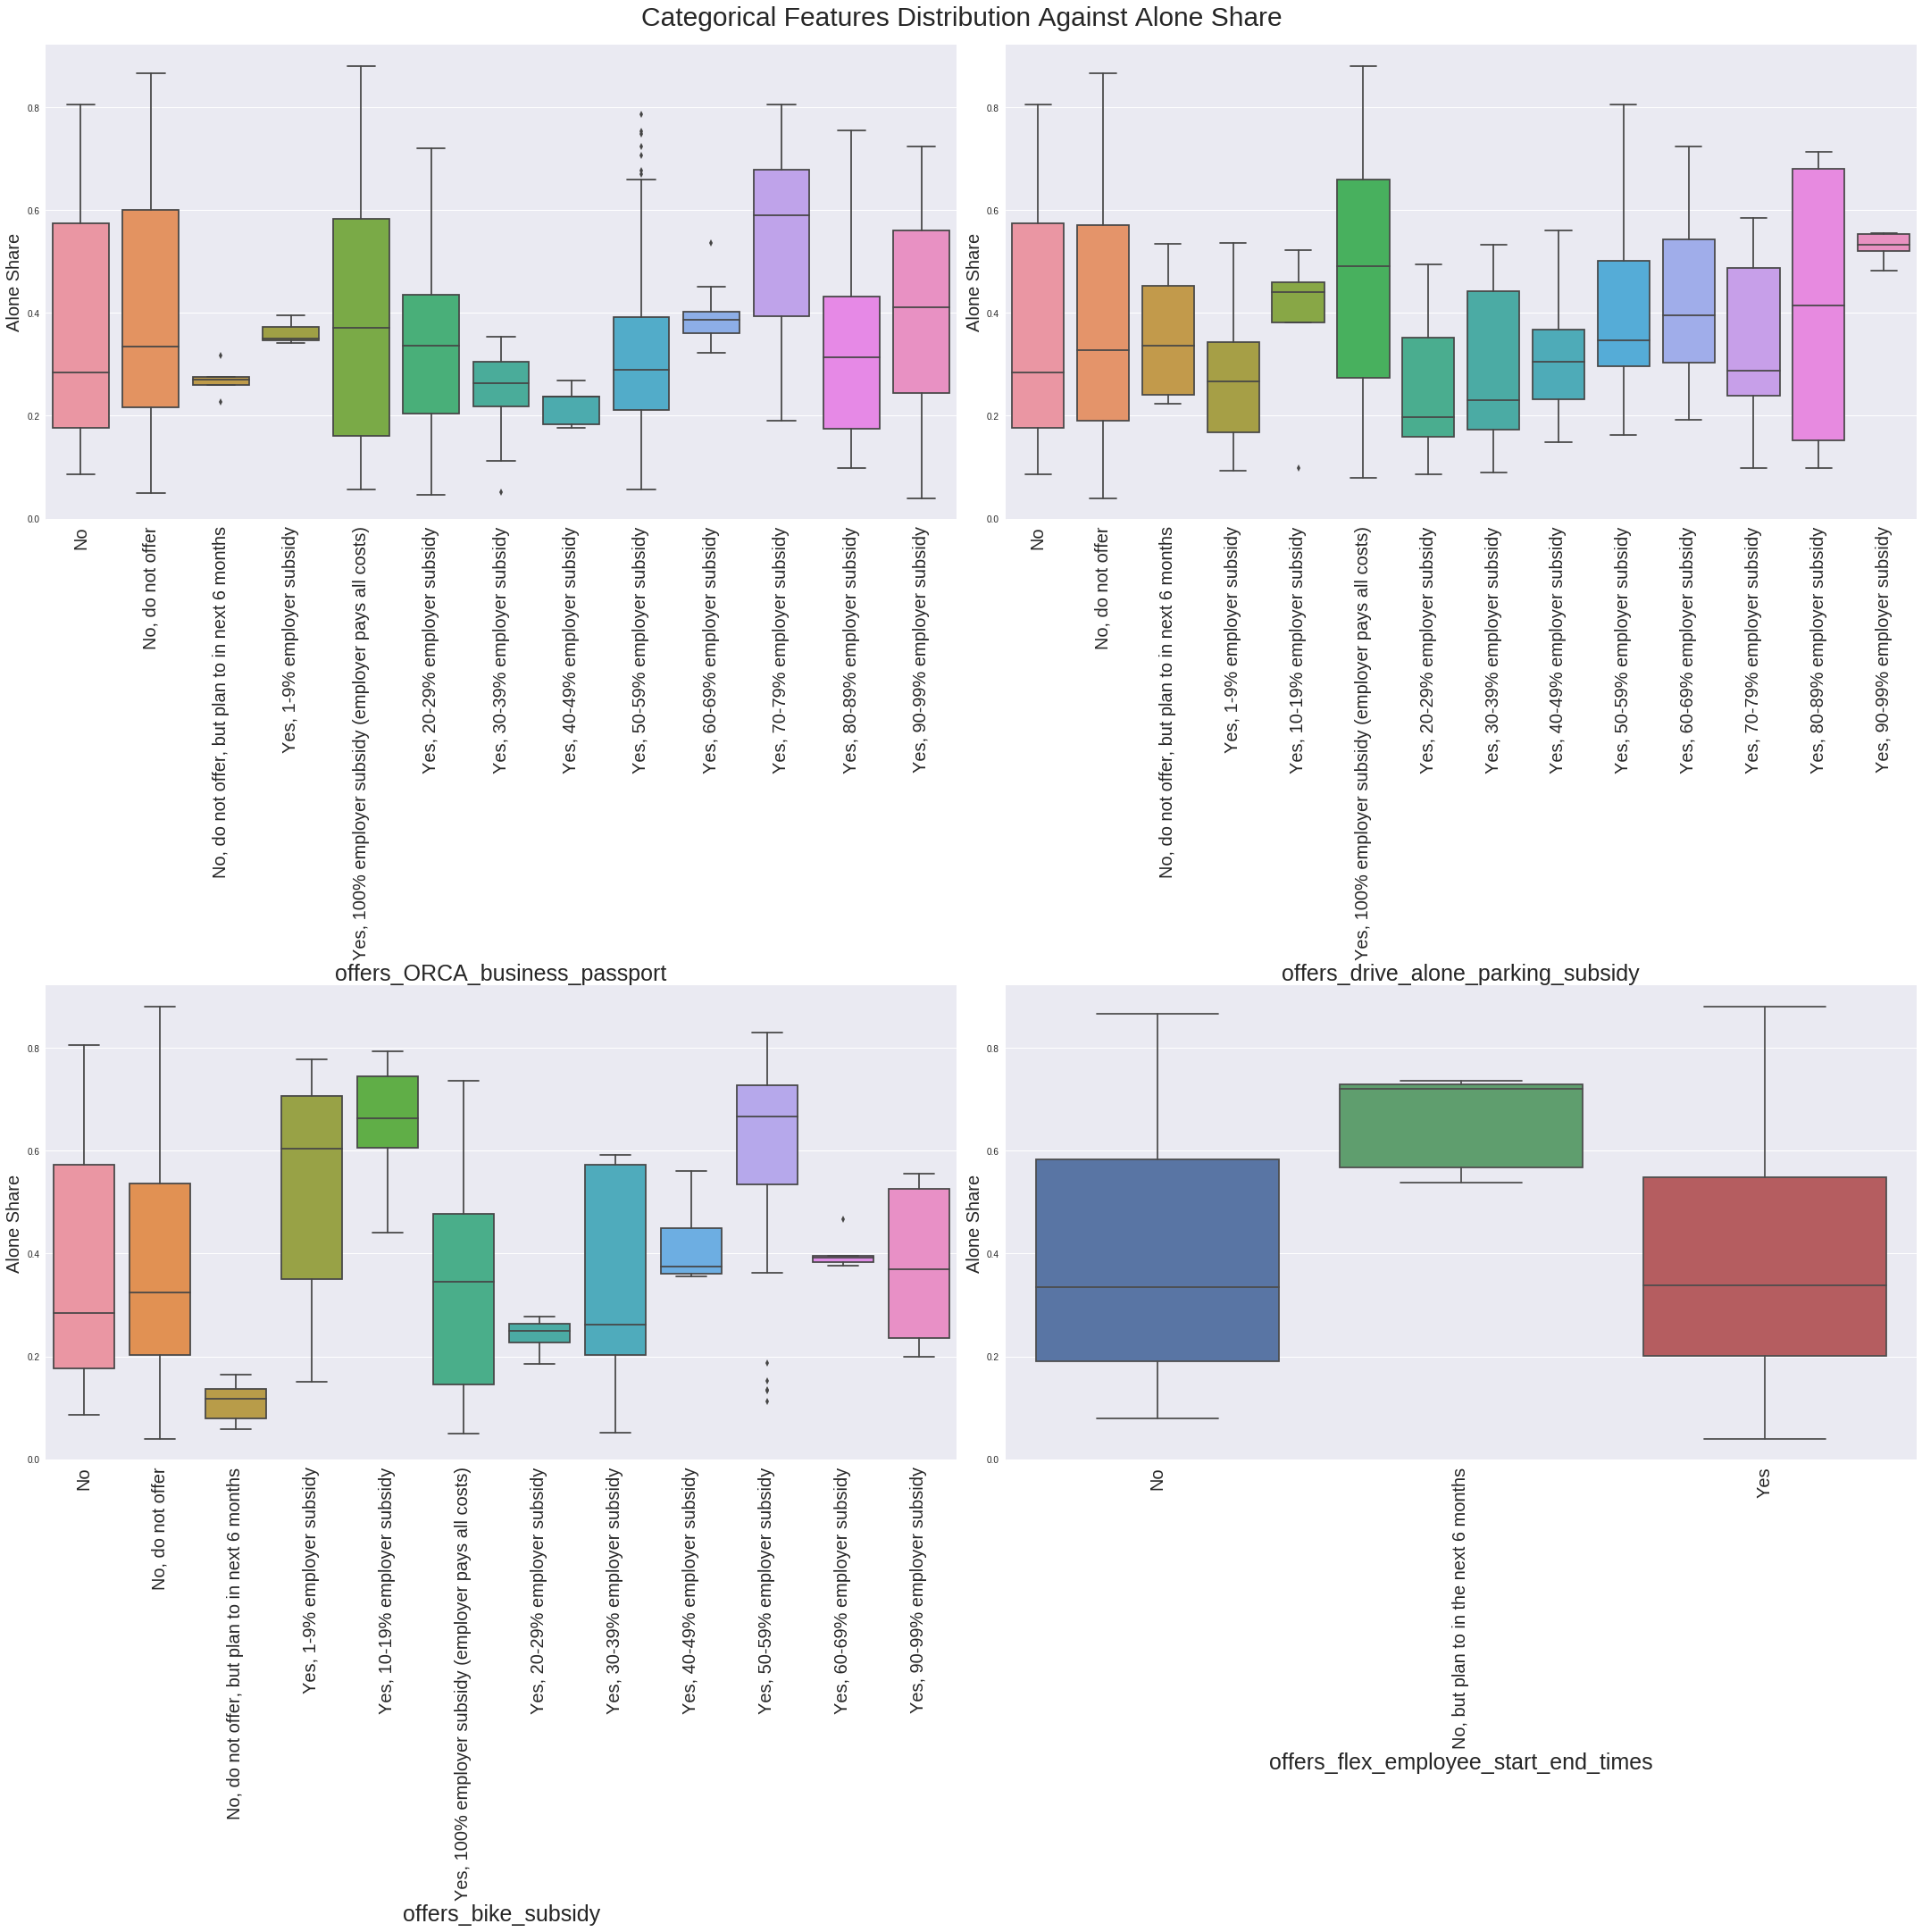

In [16]:
# i would like to come back to these plots and reorganize the labels
fig = plt.figure(figsize=(30,30))
fig.suptitle('Categorical Features Distribution Against Alone Share', fontsize=30, y=1)

for i, col in enumerate(categorical_plot_columns_2):
    fig.add_subplot(2,2,1+i)
    sns.boxplot(commute_df[col], commute_df['Alone_Share'])
    plt.xlabel(col, fontsize=25)
    plt.ylabel('Alone Share', fontsize=20)
    plt.xticks(rotation='vertical', fontsize=20)
    
plt.tight_layout()
fig.subplots_adjust(top=0.98)
plt.savefig('./figures/categorical_subplots_for_pres.png')

## 4. Heat Map showing Correlation between Features

In [17]:
commute_corr = commute_df.corr()
commute_corr.shape

(59, 59)

In [18]:
alone_corr = commute_corr[['Alone_Share']].sort_values(by='Alone_Share', ascending=False)
alone_corr.shape

(59, 1)

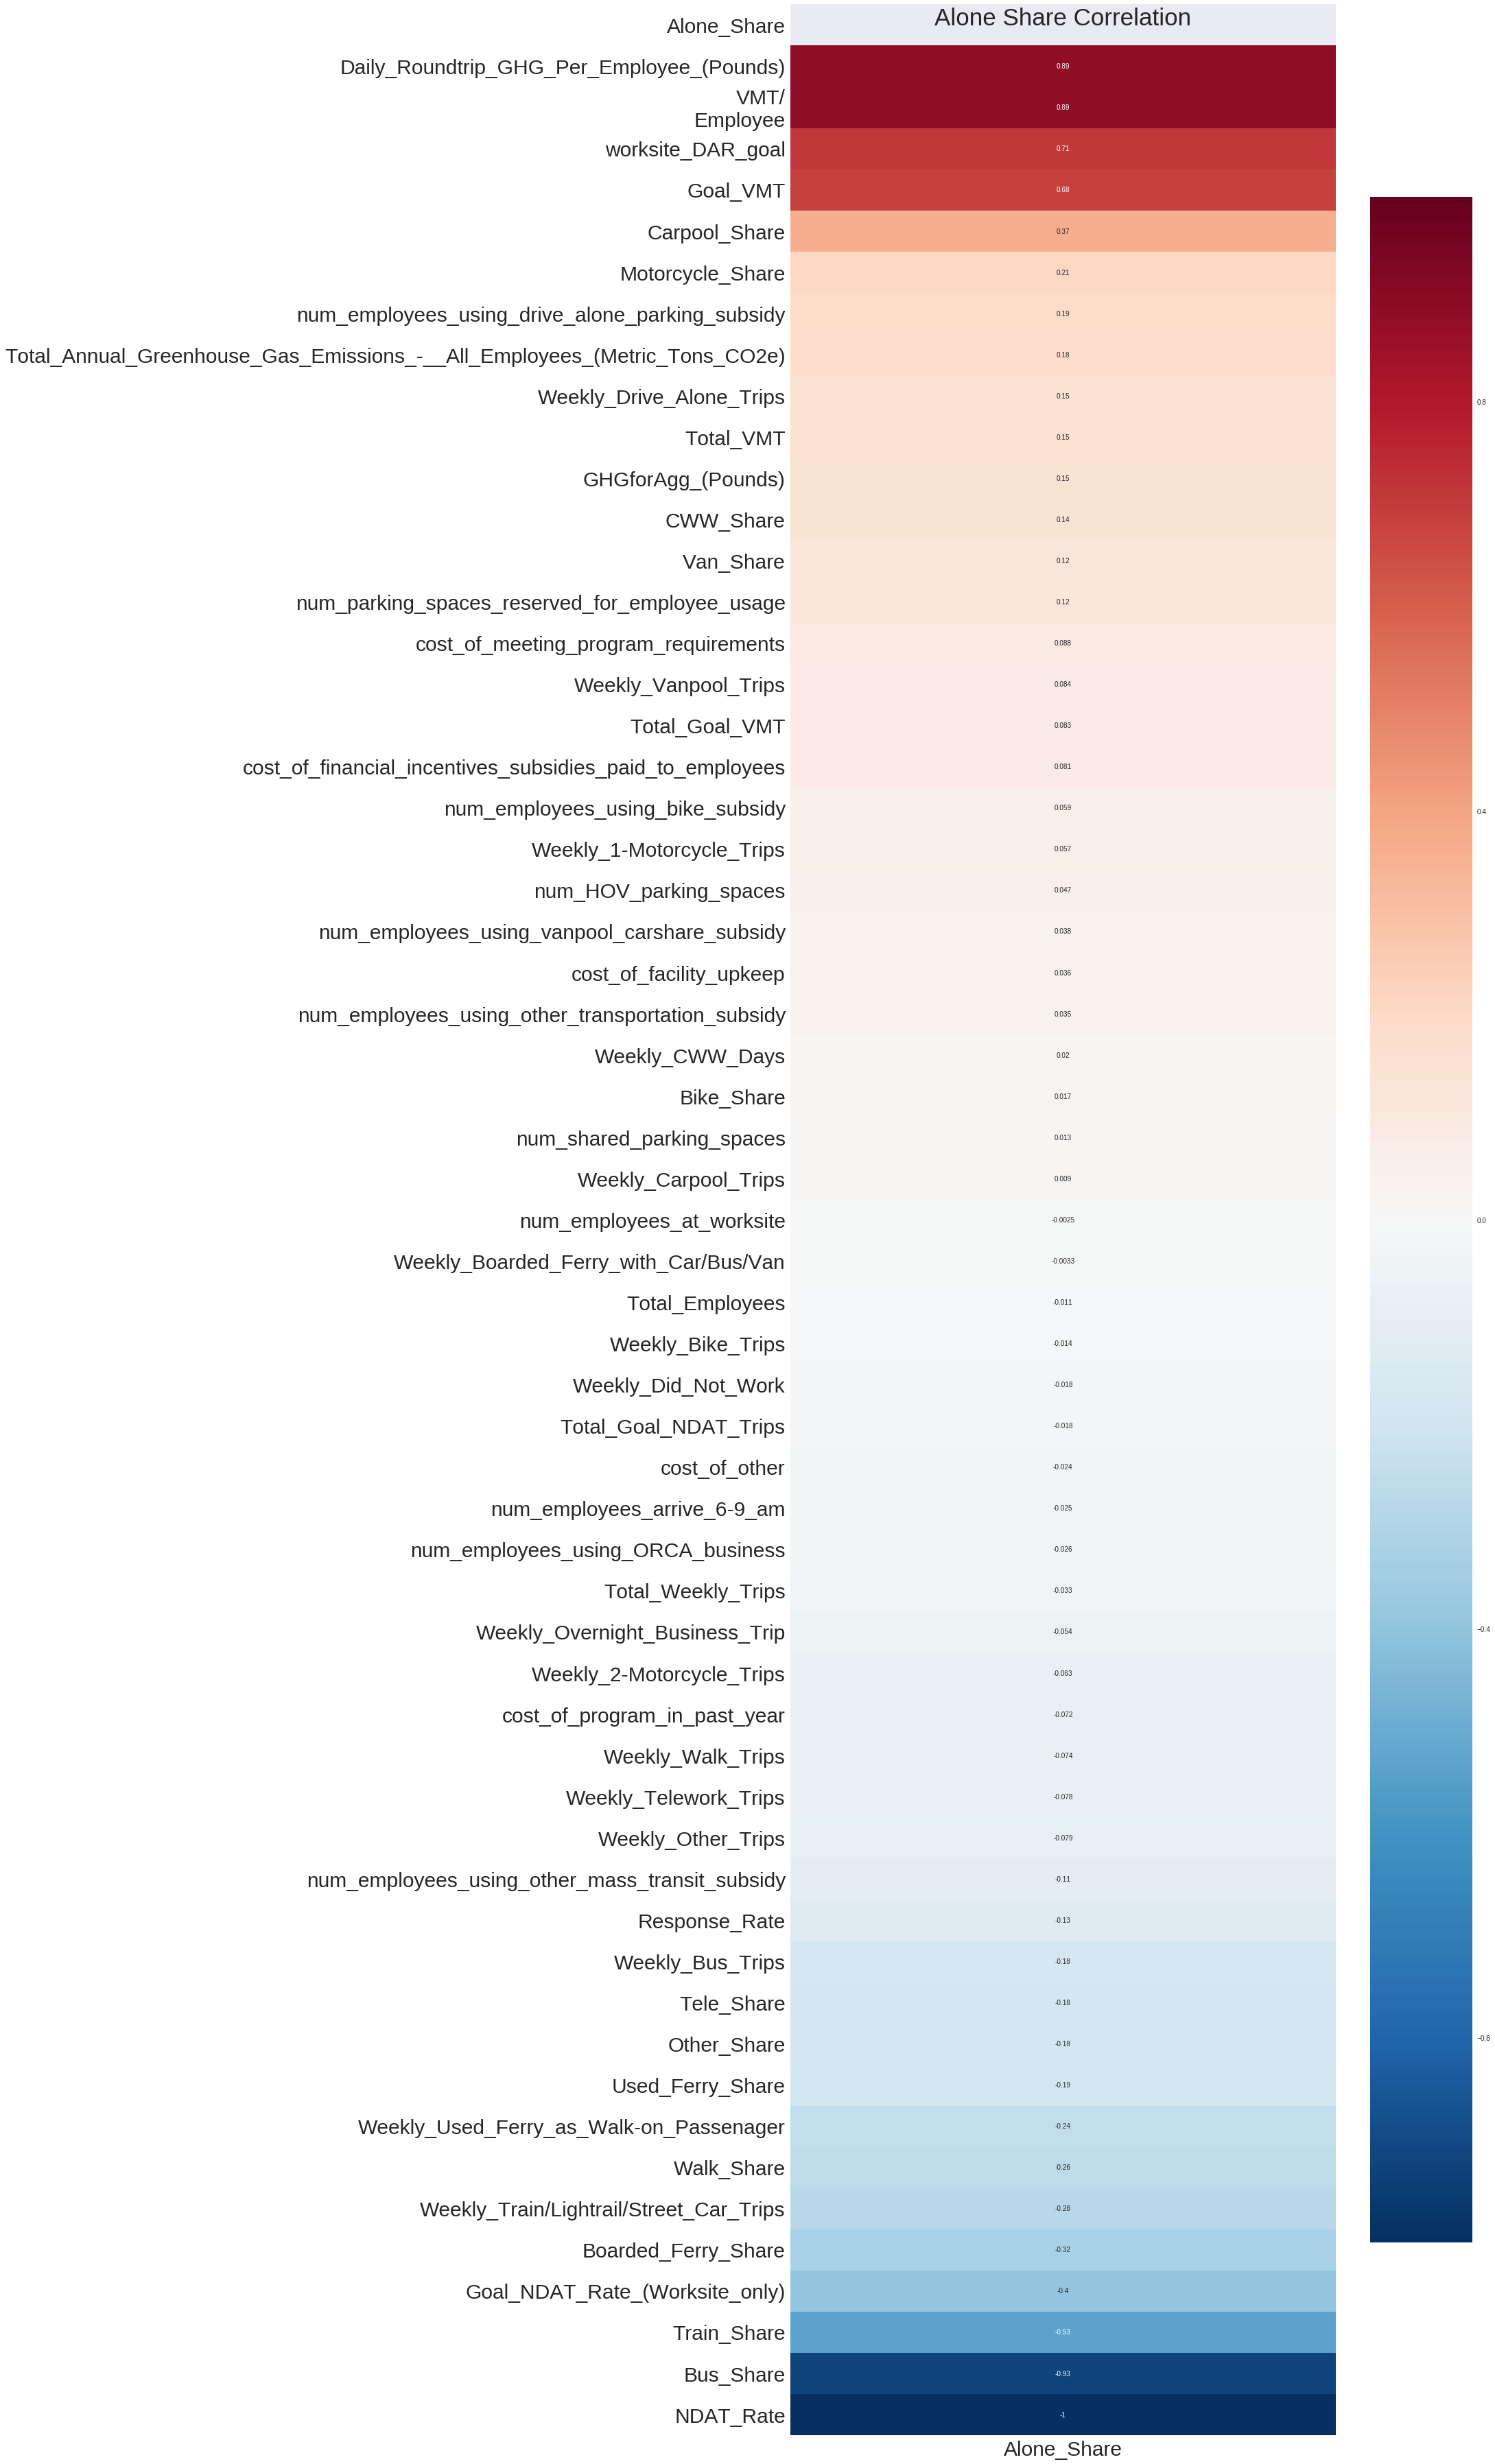

In [19]:
fix, ax = plt.subplots(figsize=(30, 50))

mask = np.zeros_like(alone_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(alone_corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=30)

plt.tight_layout()
plt.title('Alone Share Correlation', fontsize=35, y=.99)
plt.savefig('./figures/alone_share_corr.png')

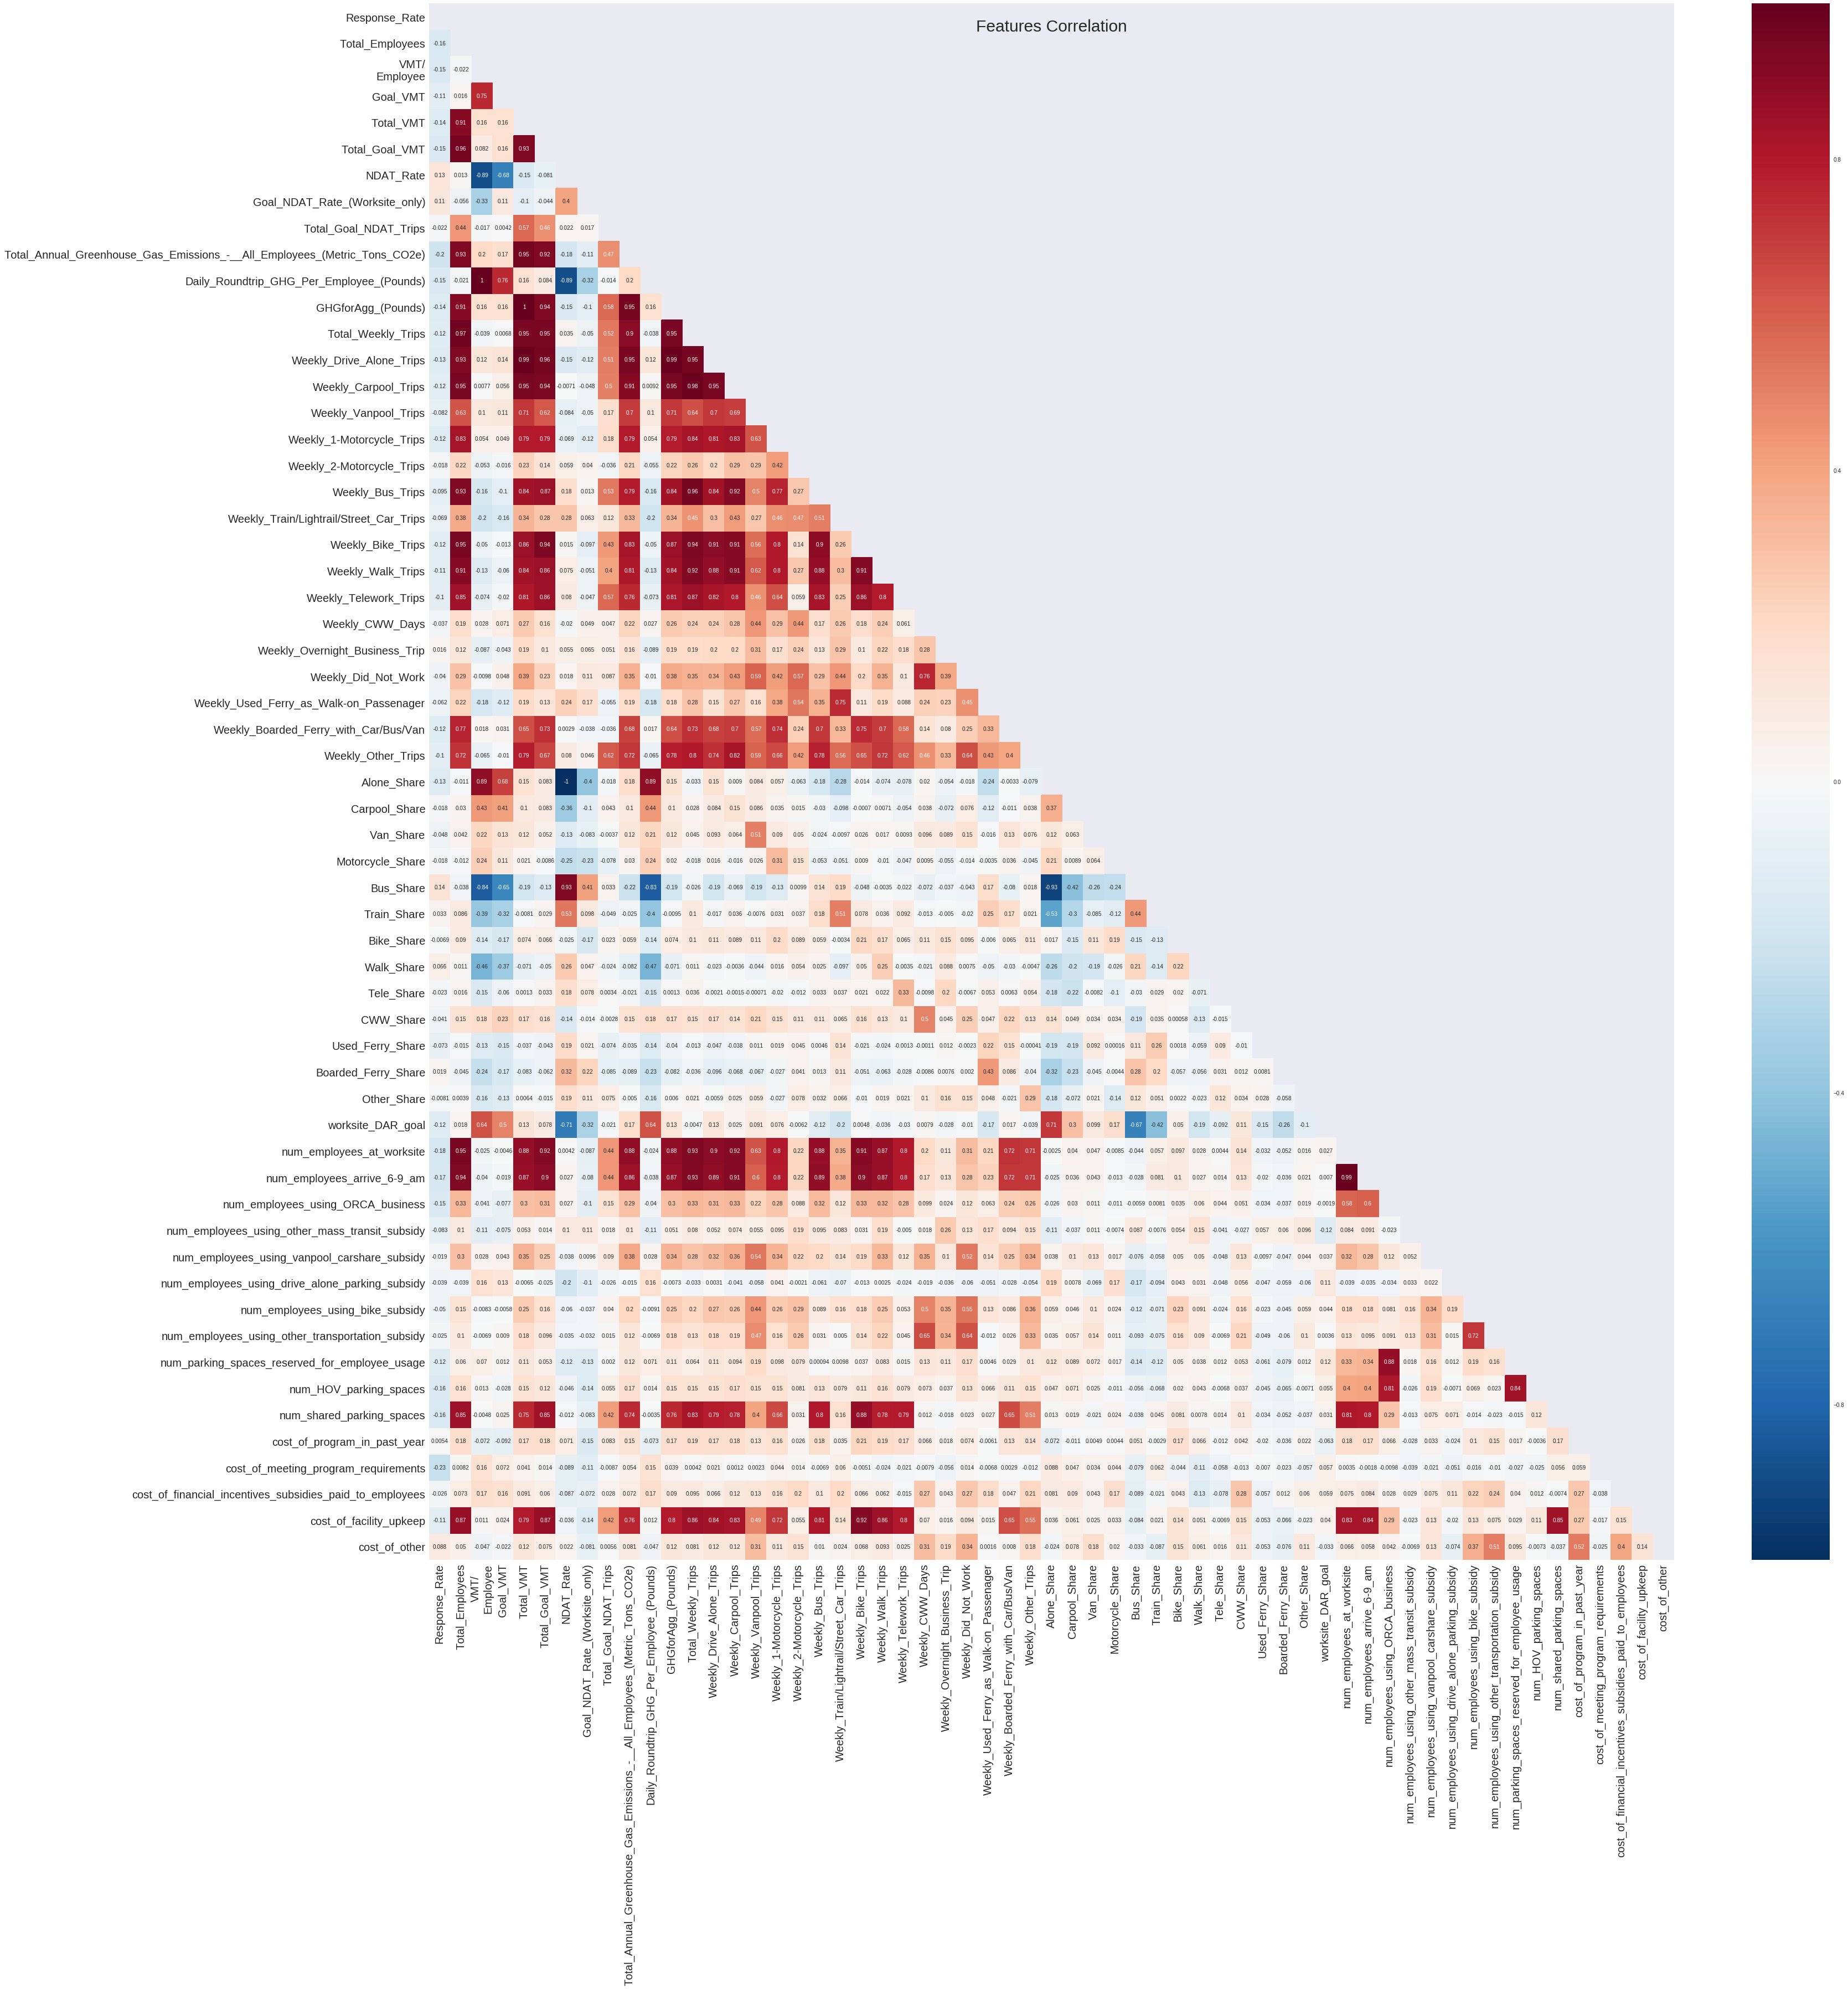

In [20]:
# heat map shows which columns are highly positively correlated (red) and highly negatively correlated (blue).
# I am interested in those features that are highly correlated with my target.
fix, ax = plt.subplots(figsize=(50, 50))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(commute_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(commute_corr, mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20, rotation='vertical')
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20)

# If you put plt.show() allows for clean viewing
plt.tight_layout()
plt.title('Features Correlation', fontsize=30, y=.98)
plt.savefig('./figures/commute_features_corr.png')

## 5. Drop Correlated Features
* `alone_share`, `total_vmt`, `weekly_drive_alone`, `How many employees arrive at your worksite between 6 and 9\xa0AM? (#)`

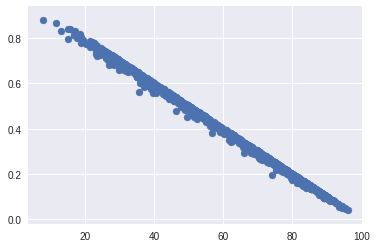

In [21]:
plt.scatter(commute_df['NDAT_Rate'], commute_df['Alone_Share'])

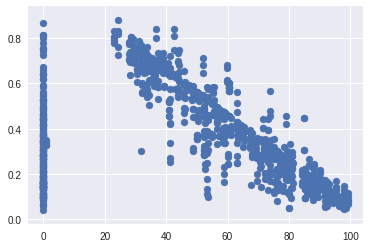

In [22]:
plt.scatter(commute_df['Goal_NDAT_Rate_(Worksite_only)'], commute_df['Alone_Share'])

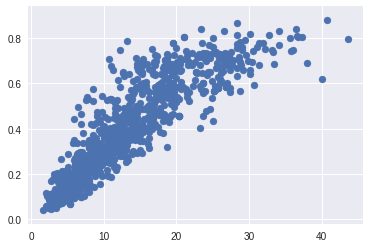

In [23]:
plt.scatter(commute_df['Daily_Roundtrip_GHG_Per_Employee_(Pounds)'], commute_df['Alone_Share'])

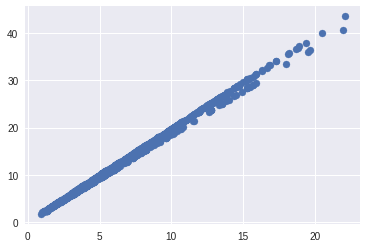

In [24]:
plt.scatter(commute_df['VMT/\nEmployee'], commute_df['Daily_Roundtrip_GHG_Per_Employee_(Pounds)'])

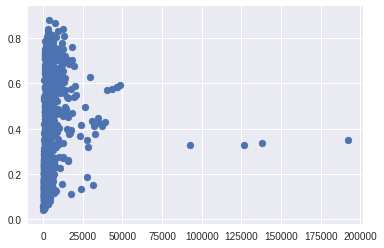

In [25]:
plt.scatter(commute_df['GHGforAgg_(Pounds)'], commute_df['Alone_Share'])

In [26]:
commute_df['VMT/\nEmployee'].unique().sum(), commute_df['Daily_Roundtrip_GHG_Per_Employee_(Pounds)'].unique().sum()

(1516.0, 4404.0)

In [27]:
duplicate_features = [
    'Weekly_Bus_Trips',
    'Weekly_Bike_Trips',
    'Weekly_Carpool_Trips',
    'Weekly_Vanpool_Trips',
    'Weekly_Telework_Trips',
    'Weekly_Train/Lightrail/Street_Car_Trips',
    'Weekly_1-Motorcycle_Trips',
    'Weekly_2-Motorcycle_Trips',
    'Weekly_Boarded_Ferry_with_Car/Bus/Van',
    'Weekly_Used_Ferry_as_Walk-on_Passenager',
    'Weekly_Other_Trips',
    'Weekly_Walk_Trips',
    'Weekly_Drive_Alone_Trips',
    'Total_Weekly_Trips',
    'NDAT_Rate',
    'Goal_NDAT_Rate_(Worksite_only)',
    'worksite_DAR_goal',
    'VMT/\nEmployee',
    'GHGforAgg_(Pounds)',
    'Total_Goal_NDAT_Trips'
]

In [28]:
commute_df_dropped_correlated = commute_df.drop(duplicate_features,
                                                axis=1)

In [29]:
len(duplicate_features), commute_df.shape, commute_df_dropped_correlated.shape

(20, (1038, 106), (1038, 86))

In [30]:
commute_stats_df = commute_df_dropped_correlated.describe().T

## 6. Pickling

In [31]:
commute_df_dropped_correlated.to_pickle('./data/dropped_correlated_features_df.pkl')

In [32]:
commute_stats_df.to_pickle('./data/commute_stats_dropped_correlated_features_df.pkl')